(<Figure size 1080x720 with 1 Axes>,
 [Text(-0.82763934, 60.177914, '0'),
  Text(-20.321974, -22.74385, '1'),
  Text(2.6109693, -57.879597, '2'),
  Text(33.605865, -26.506756, '3'),
  Text(-55.848248, -5.078835, '4'),
  Text(3.8343778, 14.240513, '5'),
  Text(-35.045834, 32.357983, '6'),
  Text(40.575832, 30.384598, '7'),
  Text(0.4873258, -20.171202, '8'),
  Text(27.060814, -2.6454933, '9')])

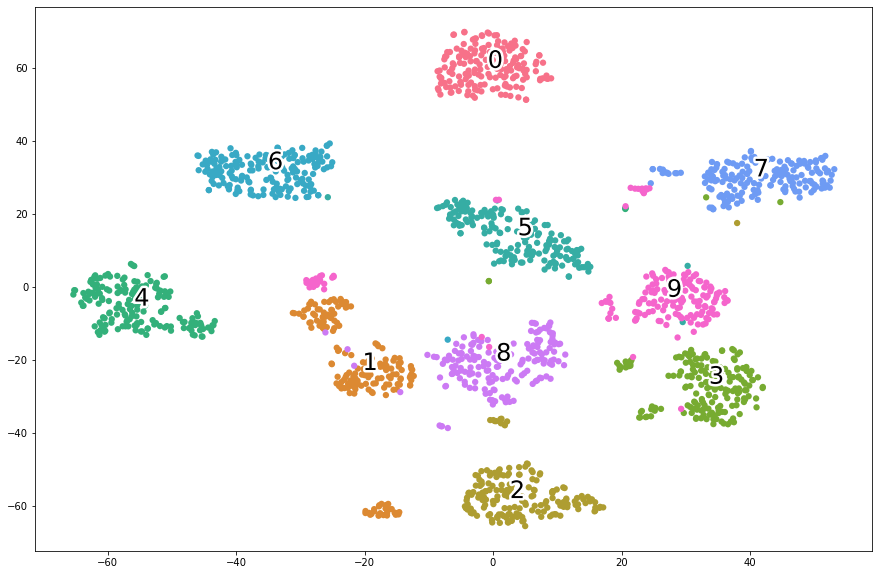

In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as se

digits = load_digits()
digits.data.shape

x = np.vstack([digits.data[digits.target==t]
               for t in range(10)])
y = np.hstack([digits.target[digits.target==t]
               for t in range(10)])
projection = TSNE(random_state=2020, n_components=2).fit_transform(x)

def graph(x, color):
    # Choosing a color palette with seaborn.
    palette = np.array(se.color_palette("husl", 10))

    # Creating a scatter plot.
    fig = plt.figure(figsize=(15, 10))
    asp = plt.subplot(aspect='equal')
    plot = asp.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[color.astype(np.int)])
    asp.axis('tight')

    # Adding digits for each scattered output.
    numbers = []
    for c in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[color == c, :], axis=0)
        txt = asp.text(xtext, ytext, str(c), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        numbers.append(txt)

    return fig, asp, plot, numbers

graph(projection, y)